In [1]:
import importlib
import sys
sys.path.append('../src')

import qa
importlib.reload(qa)
import qa

import pickle

In [ ]:
# from datasets import load_dataset

# ds = load_dataset("TIGER-Lab/MMLU-Pro")

# mmlu = {}
# for ele in ds['test']:
#     if ele['category'] not in mmlu:
#         mmlu[ele['category']] = []
#     mmlu[ele['category']].append(ele)

# import random

# mmlu_samples = []
# for cat in mmlu:
#     mmlu_samples.extend(random.Random(0).sample(mmlu[cat], 10))

# with open('../data/mmlu_samples_140.pkl', 'wb') as f:
#     pickle.dump(mmlu_samples, f)

# with open('../data/mmlu_samples_140.pkl', 'rb') as f:
#     mmlu_samples = pickle.load(f)

In [ ]:
with open('../data/res_mmlu_org.pkl', 'rb') as f:
    res_mmlu_org = pickle.load(f)


input_feat_list = []
for group_size in [4,12,50,100,1000]: # column
    input_row = []
    for agree_ratio in ['0%', '25%', '50%', '75%', '100%']: # row
        
        eval_feat = {
            'type': 'grp_ratio',
            'group_size': group_size,
            'disagree_ratio': 1-agree_ratio,
            'disagree_type': '2nd',
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.mmlu_eval(res_mmlu_org, input_feat_list)
    #     result, accuracy = qa.mmlu_eval(res_mmlu_org, eval_feat)
    #     output_row.append(accuracy)
    # output_list.append(output_row)



Processing grp_ratio samples...


Processing MMLU: 100%|██████████| 560/560 [00:14<00:00, 38.70it/s]


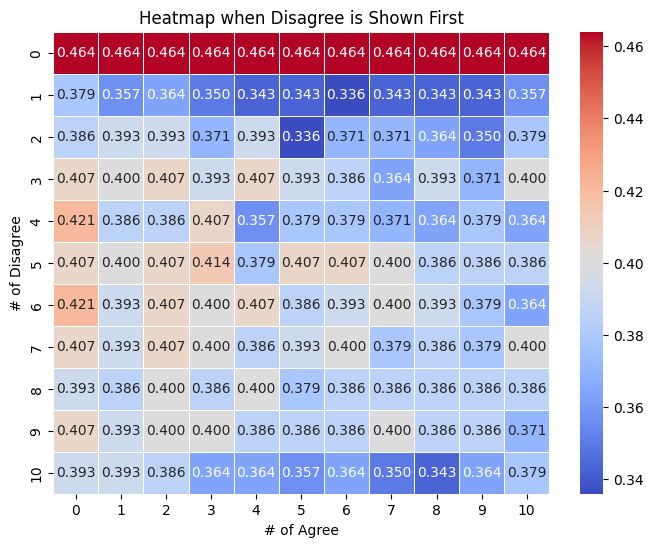

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
# data = np.array([
#     [0.45 , 0.464 , 0.464 , 0.464 , 0.464 , 0.464, 0.464, 0.464, 0.464, 0.464, 0.464],
#     [0.364 , 0.436 , 0.436 , 0.443 , 0.45 , 0.436, 0.443, 0.464, 0.45, 0.436, 0.471],
#     [0.386 , 0.421 , 0.436 , 0.443 , 0.443 , 0.429, 0.457, 0.443, 0.436, 0.443, 0.436],
#     [0.371 , 0.421 , 0.421 , 0.421 , 0.471 , 0.429, 0.45, 0.457, 0.436, 0.421, 0.45],
#     [0.386 , 0.436 , 0.4 , 0.414 , 0.436 , 0.429, 0.421, 0.457, 0.429, 0.457, 0.457],
#     [0.371, 0.443, 0.436, 0.414, 0.414, 0.429, 0.429, 0.436, 0.443, 0.443, 0.429],
#  [0.371, 0.421, 0.421, 0.386, 0.414, 0.436, 0.429, 0.443, 0.414, 0.421, 0.429],
#  [0.364, 0.421, 0.407, 0.407, 0.421, 0.421, 0.429, 0.414, 0.443, 0.414, 0.429],
#  [0.4, 0.414, 0.407, 0.407, 0.407, 0.421, 0.414, 0.414, 0.429, 0.443, 0.414],
#  [0.357, 0.407, 0.421, 0.4, 0.421, 0.407, 0.407, 0.421, 0.429, 0.443, 0.436],
#  [0.379, 0.443, 0.429, 0.414, 0.429, 0.421, 0.429, 0.436, 0.429, 0.429, 0.436]
# ])

data = np.array(output_list)

# Define row and column labels
row_labels = [str(x) for x in range(11)]
col_labels = [str(x) for x in range(11)]

# Create DataFrame
df = pd.DataFrame(data, index=row_labels, columns=col_labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.xlabel("# of Agree")
plt.ylabel("# of Disagree")
plt.title("Heatmap when Disagree is Shown First")
plt.show()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = np.array(accuracy)

# Define row and column labels
row_labels = [4,12,50,100,1000]
col_labels = ['0%', '25%', '50%', '75%', '100%']

# Create DataFrame
df = pd.DataFrame(data, index=row_labels, columns=col_labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.xlabel("% of Agree")
plt.ylabel("# of Peer")
plt.title("Heatmap of Agreement Ratio")
plt.show()

ValueError: Shape of passed values is (700, 1), indices imply (5, 5)